<img src="Imagenes/Mac_wallpaper_3.png" width="50%">

# Circuitos con múltiples qubits

### Sistemas de múltiples qubits

Hasta ahora todo lo que hemos echo ha sido manipular el estado de un solo qubit. Por lo que ahora nos hacemos la pregunta ¿Qué pasa si agregamos más qubits a nuestro sistema? De momento, vamos a empezar con dos qubits, cuyos vectores de estado son

$\hspace{11 cm}|q_{0}\rangle \hspace{0.5 cm} y \hspace{0.5 cm} |q_{1}\rangle$

Si llamamos $|\psi\rangle$ al estado del sistema formado por los dos qubits, este será el **producto tensorial** de los vectores de estado de ambos qubits. Y es aquí donde hay que tener mucho cuidado, pues el producto tensorial **no es conmutativo**, es decir 

$\hspace{8 cm} |q_{0}\rangle\otimes|q_{1}\rangle \neq |q_{1}\rangle\otimes|q_{0}\rangle \hspace{0.5 cm} si \hspace{0.5 cm} |q_{0}\rangle\neq|q_{1}\rangle$

Por lo que es importante conocer el orden en que se colocan los estados de los qubits. En el caso de Qiskit, este utiliza la convención *little-endian* que significa que el bit menos significativo se encuentra en la derecha. Entonces, si fueras a leer el resultado de una medición en binario, lo leerías de derecha a izquierda

Por ejemplo, la cadena de bits 10010 sería igual a $1*2^{4} + 0*2^{3} + 0*2^{2} + 1*2^{1} + 0*2^{0} = 18$.

Por lo tanto, nuestro estado $|\psi\rangle$ en qiskit sería representado como

$\hspace{10 cm} |\psi\rangle = |q_{1}\rangle\otimes|q_{0}\rangle$

Veamos ahora un ejemplo utilizando los estados de la base. Primero, hagámos los cálculos a mano

$\hspace{5.5 cm}|01\rangle = |0\rangle\otimes|1\rangle = \begin{pmatrix} 1 \\ 0 \end{pmatrix} \otimes \begin{pmatrix} 0 \\ 1 \end{pmatrix} = \begin{pmatrix} 1\cdot\begin{pmatrix}0 \\ 1\end{pmatrix} \\ 0\cdot\begin{pmatrix} 0 \\ 1\end{pmatrix} \end{pmatrix} = \begin{pmatrix} 0 \\ 1 \\ 0 \\ 0 \end{pmatrix}$

$\hspace{5.5 cm}|10\rangle = |1\rangle\otimes|0\rangle = \begin{pmatrix} 0 \\ 1 \end{pmatrix} \otimes \begin{pmatrix} 1 \\ 0 \end{pmatrix} = \begin{pmatrix} 0\cdot\begin{pmatrix}1 \\ 0\end{pmatrix} \\ 1\cdot\begin{pmatrix} 1 \\ 0\end{pmatrix} \end{pmatrix} = \begin{pmatrix} 0 \\ 0 \\ 1 \\ 0 \end{pmatrix}$

Como puedes ver $|01\rangle \neq |10\rangle$. Ahora, comprobemos los resultados con el simulador.

In [7]:
from qiskit import QuantumCircuit, execute, Aer

#Creamos una lista para almacenar las cuatro posibles combinaciones de dos qubits
estados = ["00","01","10","11"]

for estado in estados:
#Creamos un circuito con dos qubits sin bits clásicos, pues no vamos a hacer mediciones
    qc = QuantumCircuit(2)
    
#Preparamos nuestro estado inicial en base al estado seleccionado
    if int(estado[0]) == 1:
        qc.x(1)
    if int(estado[1]) == 1:
        qc.x(0)

#Ejecutamos el simulador y obtenemos el vector de estado 
    job = execute(qc,Aer.get_backend('statevector_simulator'),optimization_level=0)
    precision = 3 
    vector_estado = job.result().get_statevector(qc,precision).data
#Imprimimos nuestros resultados
    print("Estado:","|"+estado+">","Vector de estado:",vector_estado)

Estado: |00> Vector de estado: [1.+0.j 0.+0.j 0.+0.j 0.+0.j]
Estado: |01> Vector de estado: [0.+0.j 1.+0.j 0.+0.j 0.+0.j]
Estado: |10> Vector de estado: [0.+0.j 0.+0.j 1.+0.j 0.+0.j]
Estado: |11> Vector de estado: [0.+0.j 0.+0.j 0.+0.j 1.+0.j]


Como podemos ver, el simulador confirma nuestros cálculos. También hemos incluido el vector de estado para los estados $|00\rangle$ y $|11\rangle$, los cuales puedes confirmar por tu cuenta. <br><br>
De la misma forma que los estados $|0\rangle$ y $|1\rangle$ son la base computacional de un sistema con un qubit, los estados $|00\rangle$, $|01\rangle$, $|10\rangle$ y $|11\rangle$ son la base computacional de un sistema con dos qubits. Esto lo podemos comprobar al realizar el producto tensorial de dos vectores de estado generales:

$|\psi\rangle = (a|0\rangle + b|1\rangle)\otimes(c|0\rangle + d|1\rangle) = \begin{pmatrix} a \\ b \end{pmatrix} \otimes \begin{pmatrix} c \\ d \end{pmatrix} = \begin{pmatrix} ac \\ ad \\ bc \\ bd \end{pmatrix} = ac\begin{pmatrix} 1 \\ 0 \\ 0 \\ 0 \end{pmatrix} + ad\begin{pmatrix} 0 \\ 1 \\ 0 \\ 0 \end{pmatrix} + bc\begin{pmatrix} 0 \\ 0 \\ 1 \\ 0 \end{pmatrix} + bd\begin{pmatrix} 0 \\ 0 \\ 0 \\ 1 \end{pmatrix} = ac|00\rangle + ad|01\rangle + bc|10\rangle + bd|11\rangle$

Y podemos comporbar fácilmente que este nuevo estado $|\psi\rangle$ sigue siendo un estado válido al calcular su norma al cuadrado

$\hspace{4 cm}||\psi\rangle|^{2} = |ac|^{2}+|ad|^{2}+|bc|^{2}+|bd|^{2} = |a|^{2}(|c|^{2}+|d|^{2}) + |b|^{2}(|c|^{2}+|d|^{2}) = |a|^{2}+|b|^{2} = 1$

Este proceso se puede generalizar para $n$ qubits, donde el estado del sistema completo será el producto tensorial de los estados de los $n$ qubits

$\hspace{9 cm}|\varphi\rangle = |q_{n-1}\rangle \otimes \cdots \otimes |q_{1}\rangle \otimes |q_{0}\rangle$

El resultado será un vector de $2^{n}$ dimensiones, y una base compuesta de $2^{n}$ estados que serán todas las combinaciones de $|0\rangle$ y $|1\rangle$ posibles. En el caso que vimos anteriormente teníamos $n=2$ qubits, por lo que nuestros vectores de estado son de $2^{2} = 4$ dimensiones, y tenemos $4$ estados en la base. Como vemos, el número de cadenas de bits que podemos representar con $n$ qubits crece exponencialmente, una propiedad que será muy útil al momento de crear algoritmos.

----

Pero ¿Qué sucede con los operadores? Bueno, al igual que los estados, debemos calcular el producto tensorial de los operadores **respetando el qubit sobre el que se están aplicando**. Tomemos el siguiente caso como ejemplo: queremos aplicar una compuerta $X$ al primer qubit y una compuerta $Z$ al segundo. Entonces, el operador que utilizaríamos sobre el sistema completo sería

$\hspace{6.5 cm} O = Z \otimes X = \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix} \otimes \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix} = \begin{pmatrix} 0 & 1 & 0 & 0 \\ 1 & 0 & 0 & 0 \\ 0 & 0 & 0 & -1 \\ 0 & 0 & -1 & 0 \end{pmatrix}$

Y al igual que podemos comprobar los vectores de estado usando el simulador, también podemos comprobar la forma del operador que representa a todas las compuertas que se está aplicando sobre el sistema utilizando el backend *unitary_simulator*

In [8]:
qc = QuantumCircuit(2)

qc.x(0)
qc.z(1)

job = execute(qc,Aer.get_backend('unitary_simulator'),optimization_level=0)
precision = 3 
operador = job.result().get_unitary(qc,precision).data
print(operador)

[[ 0.+0.j  1.+0.j  0.+0.j  0.+0.j]
 [ 1.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [-0.+0.j -0.+0.j -0.+0.j -1.+0.j]
 [-0.+0.j -0.+0.j -1.+0.j -0.+0.j]]


Como podemos ver, el simulador confirma la forma de nuestro operador. Ahora, vamos a aplicarlo sobre el estado $|10\rangle$ y vamos a calcular el resultado a mano y a través del simulador.

$\hspace{8 cm} O|10\rangle = \begin{pmatrix} 0 & 1 & 0 & 0 \\ 1 & 0 & 0 & 0 \\ 0 & 0 & 0 & -1 \\ 0 & 0 & -1 & 0 \end{pmatrix}\begin{pmatrix} 0 \\ 0 \\ 1 \\ 0 \end{pmatrix} = \begin{pmatrix} 0 \\ 0 \\ 0 \\ -1 \end{pmatrix} = -|11\rangle$

In [10]:
qc = QuantumCircuit(2)

#Preparamos el estado |10>
qc.x(1)

#Aplicamos el operador O
qc.x(0)
qc.z(1)

job = execute(qc,Aer.get_backend('statevector_simulator'),optimization_level=0)
precision = 3 
operador = job.result().get_statevector(qc,precision).data
print(operador)

[ 0.+0.j  0.+0.j -0.+0.j -1.+0.j]


En el caso en que solo apliquemos una compuerta a un qubit, debemos hacer el producto tensorial de igual manera, aplicando el operador Identidad al otro qubit. Por ejemplo, si solo queremos aplicar la compuerta $X$ al primer qubit, nuestro operador será

$\hspace{6.5 cm} A = I \otimes X = \begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix} \otimes \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix} = \begin{pmatrix} 0 & 1 & 0 & 0 \\ 1 & 0 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0 \end{pmatrix}$

In [11]:
qc = QuantumCircuit(2)

qc.x(0)

job = execute(qc,Aer.get_backend('unitary_simulator'),optimization_level=0)
precision = 3 
operador = job.result().get_unitary(qc,precision).data
print(operador)

[[0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]]


De esta forma vemos que si el vector de estado de un sistema de $n$ qubits es de $2^{n}$ dimensiones, los operadores que se aplican a dicho sistema serán matrices de $2^{n}\times 2^{n}$. En el caso con $n=2$ qubits, tenemos matrices de $4\times 4$.

---

Si bien es importante conocer el proceso matemático detrás de estas operaciones, podemos usar una de las propiedades del producto tensorial para hacer más sencillos los cálculos a mano. Tomemos nuestro ejemplo del operador $O = Z\otimes X$ actuando sobre el estado $|10\rangle$:

$\hspace{6 cm} O|10\rangle = (Z\otimes X)(|1\rangle\otimes|0\rangle) = (Z|1\rangle)\otimes(X|0\rangle) = -|1\rangle\otimes|1\rangle = -|11\rangle$

---

### Compuerta CNOT

Ahora, vamos a introducir una compuerta específicamente diseñada para operar sobre dos qubits: la compuerta CNOT. Como ya es costumbre, veamos su forma matricial primero:

$\hspace{8 cm} CNOT = \begin{pmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0 \end{pmatrix}$

Sabiendo cuál es la forma vectorial de nuestros estados base, es fácil calcular el efecto de este operador sobre ellos:

- $CNOT(|00\rangle) = |00\rangle$
- $CNOT(|01\rangle) = |01\rangle$
- $CNOT(|10\rangle) = |11\rangle$
- $CNOT(|11\rangle) = |10\rangle$

Como podemos ver, el efecto de esta compuerta es aplicar un operador NOT al primer qubit cuando el segundo se encuentra en el estado $|1\rangle$. De allí su nombre, que es una abreviación de *NOT Controlado* en inglés. En este caso, decimos que el qubit que "revisa" es el *qubit control*, y el qubit sobre el que aplica el operador NOT es el *qubit objetivo*. <br><br>
Su sintaxis en Qiskit es `.cx(q[1],q[0])`, donde q[1] es el qubit control y q[0] el qubit objetivo.

In [20]:
#Creamos una lista para almacenar las cuatro posibles combinaciones de dos qubits
estados = ["00","01","10","11"]

for estado in estados:
#Creamos un circuito con dos qubits sin bits clásicos, pues no vamos a hacer mediciones
    qc = QuantumCircuit(2)
    
#Preparamos nuestro estado inicial en base al estado seleccionado
    if int(estado[0]) == 1:
        qc.x(1)
    if int(estado[1]) == 1:
        qc.x(0)

#Aplicamos el operador CNOT a cada estado base 
    qc.cx(1,0)

#Ejecutamos el simulador y obtenemos el vector de estado 
    job = execute(qc,Aer.get_backend('statevector_simulator'),optimization_level=0)
    precision = 3 
    vector_estado = job.result().get_statevector(qc,precision).data
#Imprimimos nuestros resultados
    print("CNOT","|"+estado+">","=",vector_estado)

CNOT |00> = [1.+0.j 0.+0.j 0.+0.j 0.+0.j]
CNOT |01> = [0.+0.j 1.+0.j 0.+0.j 0.+0.j]
CNOT |10> = [0.+0.j 0.+0.j 0.+0.j 1.+0.j]
CNOT |11> = [0.+0.j 0.+0.j 1.+0.j 0.+0.j]


¿Qué pasa si ahora queremos que el primer qubit sea el qubit control y el segundo el objetivo? Bueno, primero veamos cómo luciría la nueva matriz

$\hspace{8 cm} CNOT = \begin{pmatrix} 1 & 0 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0 \\ 0 & 1 & 0 & 0 \end{pmatrix}$

Este operador debería comportarse de la siguiente forma:

- $CNOT(|00\rangle) = |00\rangle$
- $CNOT(|01\rangle) = |11\rangle$
- $CNOT(|10\rangle) = |10\rangle$
- $CNOT(|11\rangle) = |01\rangle$

In [14]:
#Creamos una lista para almacenar las cuatro posibles combinaciones de dos qubits
estados = ["00","01","10","11"]

for estado in estados:
#Creamos un circuito con dos qubits sin bits clásicos, pues no vamos a hacer mediciones
    qc = QuantumCircuit(2)
    
#Preparamos nuestro estado inicial en base al estado seleccionado
    if int(estado[0]) == 1:
        qc.x(1)
    if int(estado[1]) == 1:
        qc.x(0)

#Aplicamos el operador CNOT a cada estado base 
    qc.cx(0,1)

#Ejecutamos el simulador y obtenemos el vector de estado 
    job = execute(qc,Aer.get_backend('statevector_simulator'),optimization_level=0)
    precision = 3 
    vector_estado = job.result().get_statevector(qc,precision).data
#Imprimimos nuestros resultados
    print("CNOT","|"+estado+">","=",vector_estado)

CNOT |00> = [1.+0.j 0.+0.j 0.+0.j 0.+0.j]
CNOT |01> = [0.+0.j 0.+0.j 0.+0.j 1.+0.j]
CNOT |10> = [0.+0.j 0.+0.j 1.+0.j 0.+0.j]
CNOT |11> = [0.+0.j 1.+0.j 0.+0.j 0.+0.j]


---

Finalmente, ahora que tenemos la compuerta CNOT a nuestra disposición, vamos a ver cómo esta nos puede ayudar a entrelazar dos qubits. Para ello vamos a tomar un sistema donde el primer qubit se encuentra en superposición, y el segundo esta inicializado en el estado $|0\rangle$

$\hspace{7 cm} |+0\rangle = \dfrac{1}{\sqrt{2}}(|0\rangle + |1\rangle)\otimes|0\rangle = \dfrac{1}{\sqrt{2}}(|00\rangle + |10\rangle)$

Ahora aplicamos un operador CNOT que tenga como qubit control el segundo qubit:

$\hspace{6 cm} CNOT|+0\rangle = \dfrac{1}{\sqrt{2}}(CNOT|00\rangle + CNOT|10\rangle) = \dfrac{1}{\sqrt{2}}(|00\rangle + |11\rangle)$

Notamos que en este nuevo estado nuestros dos qubits están entrelazados, pues al momento de medir uno de los dos sabremos de inmediato cuál es el valor del otro. Por ejemplo, si medimos el primer qubit y obtenemos el estado $|0\rangle$, sin necesidad de medir el segundo qubit sabremos que este también se encuentra en el estado $|0\rangle$. Veamos esto en el simulador, evaluando el vector de estado que resulta de medir únicamente uno de los qubits, y lo compararemos con un par de qubits que no están entrelazados.

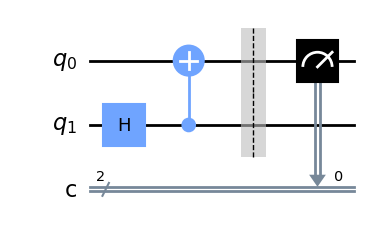

In [21]:
qc = QuantumCircuit(2,2)

qc.h(1)
qc.cx(1,0)

qc.barrier()

qc.measure(0,0)

qc.draw(output="mpl")

In [24]:
job = execute(qc,Aer.get_backend('statevector_simulator'),optimization_level=0)
precision = 3 
vector_estado = job.result().get_statevector(qc,precision).data
print(vector_estado)

[1.+0.j 0.+0.j 0.+0.j 0.+0.j]


Ahora, probemos hacer lo mismo con el estado

$\hspace{6 cm} |++\rangle = \dfrac{1}{\sqrt{2}}\dfrac{1}{\sqrt{2}}(|0\rangle + |1\rangle)\otimes(|0\rangle + |1\rangle) = \dfrac{1}{2}(|00\rangle + |10\rangle + |01\rangle + |11\rangle)$

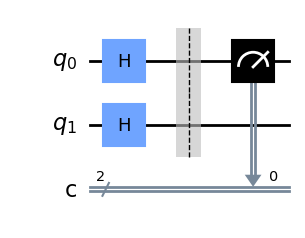

In [25]:
qc = QuantumCircuit(2,2)

qc.h(1)
qc.h(0)

qc.barrier()

qc.measure(0,0)

qc.draw(output="mpl")

In [35]:
job = execute(qc,Aer.get_backend('statevector_simulator'),optimization_level=0)
precision = 3 
vector_estado = job.result().get_statevector(qc,precision).data
print(vector_estado)

[0.707+0.j 0.   +0.j 0.707+0.j 0.   +0.j]


Notamos que el vector de estado que obtenemos es el de una superposición, a diferencia del caso donde hay entrelazamiento, en el que el vector de estado resultante es el de un único estado de la base.

De manera más general, decimos que dos estados están entrelazados cuando no podemos expresar el estado del sistema como el producto tensorial de dos estados.